In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [3]:
n = pypsa.Network("results/testBiomass5/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f27a5eb8bb0>,
 <matplotlib.collections.LineCollection at 0x7f27a4ae71c0>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


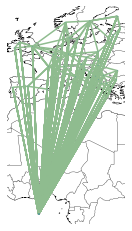

In [4]:
n.plot()

In [4]:
n.objective / 1e9 #billion EUR p.a.

1235.1617044657407

In [5]:
import cartopy.crs as ccrs

In [6]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


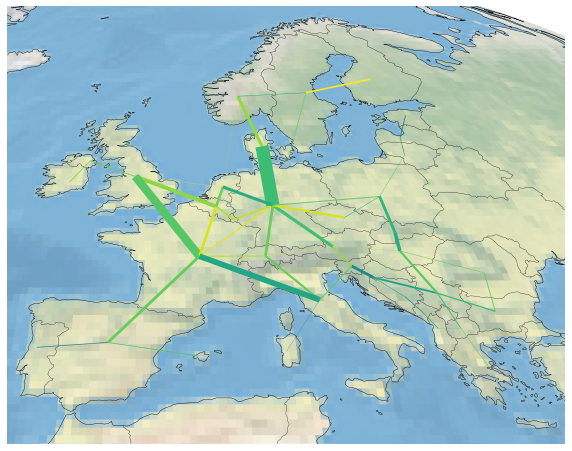

In [7]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac         0.015276
AL0 0 onwind             0.015602
AL0 0 solar          17868.707208
AT0 0 onwind             0.032205
AT0 0 ror             4478.505031
                        ...      
SK0 0 onwind             0.042093
SK0 0 ror              641.330000
SK0 0 solar              0.440233
EU gas              814794.679088
EU oil              969562.149129
Name: p_nom_opt, Length: 152, dtype: float64

In [5]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
ES0 0 Fischer-Tropsch    6391.347254
GR0 0 Fischer-Tropsch     527.103839
IT0 0 Fischer-Tropsch      10.120387
ES2 0 Fischer-Tropsch       3.664285
IT1 0 Fischer-Tropsch       1.036309
BG0 0 Fischer-Tropsch       0.560882
PT0 0 Fischer-Tropsch       0.232948
GB4 0 Fischer-Tropsch       0.018012
IE4 0 Fischer-Tropsch       0.017882
GB5 0 Fischer-Tropsch       0.017146
DK0 0 Fischer-Tropsch       0.015257
NL0 0 Fischer-Tropsch       0.015226
BE0 0 Fischer-Tropsch       0.015213
LU0 0 Fischer-Tropsch       0.015186
DK3 0 Fischer-Tropsch       0.015123
NO3 0 Fischer-Tropsch       0.014962
DE0 0 Fischer-Tropsch       0.014918
FR0 0 Fischer-Tropsch       0.014797
CH0 0 Fischer-Tropsch       0.014739
AT0 0 Fischer-Tropsch       0.014679
CZ0 0 Fischer-Tropsch       0.014663
SE3 0 Fischer-Tropsch       0.014588
PL0 0 Fischer-Tropsch       0.014455
SI0 0 Fischer-Tropsch       0.014451
SK0 0 Fischer-Tropsch       0.014440
FI3 0 Fischer-Tropsch       0.014384
HR0 0 Fischer-Tropsch       0.014

In [6]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


carrier
BEV charger                                           2394.030982
BioSNG                                                   0.000035
DAC                                                      0.000098
DC                                                     502.894748
Fischer-Tropsch                                          6.934512
H2 Electrolysis                                        175.325694
H2 Fuel Cell                                             0.000584
H2 pipeline                                             82.634796
OCGT                                                   136.260885
SMR                                                      0.000916
SMR CC                                                   0.000439
Sabatier                                                 0.000321
V2G                                                   2394.030982
battery charger                                          0.022933
battery discharger                                       0.023406
bi

In [7]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,10.279724
2013-01-05 01:00:00,21.137265
2013-01-09 02:00:00,31.994807
2013-01-13 03:00:00,42.852349
2013-01-17 04:00:00,53.709889
...,...
2013-12-14 14:00:00,866.570473
2013-12-18 15:00:00,876.847069
2013-12-22 16:00:00,886.594186


In [12]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-68493.189553
2013-01-05 01:00:00,-68493.334831
2013-01-09 02:00:00,-68493.326071
2013-01-13 03:00:00,-68493.351544
2013-01-17 04:00:00,-68493.319835
...,...
2013-12-14 14:00:00,-68493.216945
2013-12-18 15:00:00,-68493.146883
2013-12-22 16:00:00,-68493.121328


In [13]:
n.stores.e_nom_opt

name
co2 atmosphere           6.898071e+08
co2 stored               5.999999e+08
EU gas Store             2.976786e+08
DE0 0 H2 Store           1.008776e+02
DK0 0 H2 Store           3.459975e+02
                             ...     
RO0 0 battery storage    9.211875e+04
RS0 0 battery storage    6.898005e+04
SE3 0 battery storage    9.351169e+04
SI0 0 battery storage    2.374688e+04
SK0 0 battery storage    3.717263e+04
Name: e_nom_opt, Length: 575, dtype: float64

In [14]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry       9056.016375
DE0 0 solid biomass for lowT industry CC    1872.064998
DE0 0 methane for lowT industry             3134.122016
DE0 0 methane for lowT industry CC             0.058255
DE0 0 H2 for lowT industry                     0.007058
Name: p_nom_opt, dtype: float64

In [15]:
n.links.loc[n.links.carrier=='digestable biomass to gas'].p_nom_opt.sort_values(ascending=False).head(50)

name
DK3 0 digestable biomass    0.003744
SI0 0 digestable biomass    0.003719
IT1 0 digestable biomass    0.003567
NO3 0 digestable biomass    0.003553
GB4 0 digestable biomass    0.003533
ES2 0 digestable biomass    0.003516
PT0 0 digestable biomass    0.003506
DK0 0 digestable biomass    0.003480
FI3 0 digestable biomass    0.003469
AT0 0 digestable biomass    0.003455
CH0 0 digestable biomass    0.003434
SE3 0 digestable biomass    0.003347
GR0 0 digestable biomass    0.003346
BE0 0 digestable biomass    0.003237
NL0 0 digestable biomass    0.003223
CZ0 0 digestable biomass    0.003220
HU0 0 digestable biomass    0.003161
LU0 0 digestable biomass    0.003047
HR0 0 digestable biomass    0.003045
PL0 0 digestable biomass    0.002969
GB5 0 digestable biomass    0.002965
LV6 0 digestable biomass    0.002928
IT0 0 digestable biomass    0.002894
IE4 0 digestable biomass    0.002869
LT6 0 digestable biomass    0.002866
MK0 0 digestable biomass    0.002859
SK0 0 digestable biomass    0.002

In [4]:
n.links.p_nom_opt.filter(regex='SE.*digestable').head(50)

name
SE3 0 manureslurry digestable biomass          0.235144
SE3 0 municipal biowaste digestable biomass    0.231566
SE3 0 sewage sludge digestable biomass         0.251140
SE3 0 straw digestable biomass                 0.238556
SE3 0 digestable biomass                       1.006718
Name: p_nom_opt, dtype: float64

In [8]:
n.links.p_nom_opt.filter(regex='DE.*solid').head(50) #MW

name
DE0 0 solid biomass for lowT industry             0.054311
DE0 0 solid biomass for lowT industry CC      15952.397725
DE0 0 poplar solid biomass                     2628.531301
DE0 0 forest residues solid biomass           35247.766028
DE0 0 industry wood residues solid biomass    14458.699581
DE0 0 import1 solid biomass                     441.205340
DE0 0 import2 solid biomass                       0.894358
DE0 0 import3 solid biomass                       0.438241
DE0 0 import4 solid biomass                       0.284562
DE0 0 import5 solid biomass                       0.207032
DE0 0 import6 solid biomass                       0.166521
DE0 0 import7 solid biomass                       0.138244
DE0 0 import8 solid biomass                       0.116062
DE0 0 import9 solid biomass                       0.099982
DE0 0 solid biomass to gas                        0.000933
DE0 0 urban central solid biomass CHP             0.027722
DE0 0 urban central solid biomass CHP CC      12662

In [16]:
n.links.p_nom_opt.filter(regex='Tropsch').sum()#head(50) #GW?

0.2288007387006432

In [13]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


In [12]:
n.links_t.p0.filter(regex='biomass').sum().sum()*97 * 3.6/1e9 #EJ

14.352618166342994

In [26]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


<AxesSubplot:xlabel='name'>

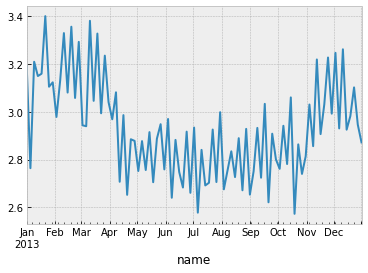

In [17]:
(n.loads_t.p_set.filter(regex='DE.*transport oil').sum(axis=1) *97 * 3.6 / 1e6).plot() #PJ

In [16]:
n.loads_t.p.filter(regex='electricity').sum().sum()*3.6/1e6

63.47249999999998

In [14]:
n.stores_t.p.filter(regex='import').sum().sum()*97*3.6/1e9

0.09952476548443973

In [13]:
n.stores_t.p.filter(regex='digestable biomass').sum().sum()*97*3.6/1e6

0.0014151303794513017

In [9]:
n.stores_t.e.filter(regex='import').head(5)

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.781014e+09,2.777768e+08,2.777773e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08,2.777777e+08
2013-01-05 01:00:00,1.774946e+09,2.777759e+08,2.777768e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08,2.777775e+08,2.777776e+08
2013-01-09 02:00:00,1.768907e+09,2.777749e+08,2.777764e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08
2013-01-13 03:00:00,1.762857e+09,2.777739e+08,2.777759e+08,2.777766e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777773e+08,2.777773e+08
2013-01-17 04:00:00,1.756822e+09,2.777730e+08,2.777754e+08,2.777763e+08,2.777767e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777772e+08


In [10]:
n.links_t.p0.filter(regex='solid biomass').sum().sum() * 97 * 3.6 / 1e9 #EJ

12.606617693663784

In [12]:
(n.stores_t.e.filter(regex='import.*solid biomass').max() - n.stores_t.e.filter(regex='import.*solid biomass').min()) * 3.6 / 1e9 #EJ biomass import

name
import1 solid biomass    1.839340
import2 solid biomass    0.000303
import3 solid biomass    0.000149
import4 solid biomass    0.000097
import5 solid biomass    0.000070
import6 solid biomass    0.000055
import7 solid biomass    0.000044
import8 solid biomass    0.000039
import9 solid biomass    0.000034
dtype: float64

<AxesSubplot:xlabel='name'>

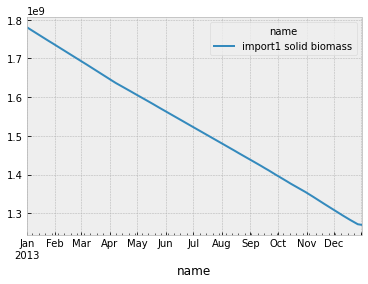

In [13]:
n.stores_t.e.filter(regex='import1 solid biomass').plot()

In [21]:
n.stores_t.e.filter(regex='import.*solid biomass').head()

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.787028e+09,2.777776e+08,2.777776e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08
2013-01-05 01:00:00,1.787027e+09,2.777774e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08
2013-01-09 02:00:00,1.787027e+09,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08
2013-01-13 03:00:00,1.787027e+09,2.777770e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08,2.777775e+08,2.777775e+08,2.777775e+08
2013-01-17 04:00:00,1.787027e+09,2.777768e+08,2.777771e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777774e+08,2.777775e+08,2.777775e+08


In [14]:
n.stores_t.e.filter(regex='import.*solid biomass')

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.781014e+09,2.777768e+08,2.777773e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08,2.777777e+08
2013-01-05 01:00:00,1.774946e+09,2.777759e+08,2.777768e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08,2.777775e+08,2.777776e+08
2013-01-09 02:00:00,1.768907e+09,2.777749e+08,2.777764e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777773e+08,2.777774e+08,2.777775e+08
2013-01-13 03:00:00,1.762857e+09,2.777739e+08,2.777759e+08,2.777766e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777773e+08,2.777773e+08
2013-01-17 04:00:00,1.756822e+09,2.777730e+08,2.777754e+08,2.777763e+08,2.777767e+08,2.777769e+08,2.777771e+08,2.777772e+08,2.777772e+08
...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,1.288230e+09,2.776966e+08,2.777377e+08,2.777519e+08,2.777590e+08,2.777630e+08,2.777661e+08,2.777674e+08,2.777687e+08
2013-12-18 15:00:00,1.282477e+09,2.776956e+08,2.777373e+08,2.777515e+08,2.777587e+08,2.777628e+08,2.777659e+08,2.777673e+08,2.777686e+08
2013-12-22 16:00:00,1.277067e+09,2.776947e+08,2.777368e+08,2.777512e+08,2.777585e+08,2.777627e+08,2.777658e+08,2.777671e+08,2.777685e+08


In [15]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() * 8760 /len(n.snapshots) * 3.6 / 1e9

7.0119550114437486

In [16]:
n.loads_t.p_set.filter(regex='transport oil').sum().sum() * 3.6 / 1e9

0.017171333458102983

In [17]:
n.links_t.p0.filter(regex='Fischer-Tropsch').sum().sum() * 8760 / len(n.snapshots) *3.6 / 1e9 #EJ

0.1374838714448183

In [18]:
n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum() * 8760 /len(n.snapshots) * 3.6 / 1e9

7.791061123369446

In [19]:
n.loads_t.p_set.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum()#.sum()# * 3.6 /1e9 #EJ

AL0 0 land transport oil     10312.311019
AT0 0 land transport oil    110166.002359
BA0 0 land transport oil      7221.142681
BE0 0 land transport oil    146804.224227
BG0 0 land transport oil     35046.508607
CH0 0 land transport oil     68985.912218
CZ0 0 land transport oil     87043.971785
DE0 0 land transport oil    764068.612683
DK0 0 land transport oil     41389.221195
DK3 0 land transport oil     22078.063652
EE6 0 land transport oil      9786.797339
ES0 0 land transport oil    420264.374917
ES2 0 land transport oil      5852.620907
FI3 0 land transport oil     70109.274423
FR0 0 land transport oil    720112.812149
GB4 0 land transport oil     15597.924018
GB5 0 land transport oil    551023.610871
GR0 0 land transport oil     84392.851515
HR0 0 land transport oil     29527.873158
HU0 0 land transport oil     50459.657260
IE4 0 land transport oil     53991.308300
IT0 0 land transport oil    576625.011196
IT1 0 land transport oil     15858.820180
LT6 0 land transport oil     23147

In [20]:
(n.links_t.p0.filter(regex='Fischer-Tropsch').sum().sum()+n.links_t.p0.filter(regex='biomass to liquid').sum().sum()) / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

0.9176463603197362

In [21]:
n.loads_t.p.filter(regex='kerosene').sum() * 3.6 / 1e9

name
kerosene for aviation    0.022896
dtype: float64

In [22]:
n.loads.p_set.filter(regex='kerosene') * len(n.snapshots) * 3.6 / 1e9

name
kerosene for aviation    0.022896
Name: p_set, dtype: float64

In [23]:
(n.loads_t.p.filter(regex='kerosene').sum() * 3.6 / 1e9) / (n.loads.p_set.filter(regex='kerosene') * 3.6 / 1e9)

name
kerosene for aviation    91.0
dtype: float64

In [70]:
len(n.snapshots)#8761/97#n.generators_t.p.filter(regex='EU oil').sum() *3.6/1e6

91

In [24]:
n.stores_t.e.filter(regex='EU oil').tail(1)

name,EU oil Store
name,
2013-12-30 18:00:00,3.470699e+08


In [18]:
n.components["Load"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus,string,NaN,,Name of bus to which load is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for load type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
p_set,static or series,MW,0.0,Active power consumption (positive if the load...,Input (optional),True,True,<class 'float'>,float64
q_set,static or series,MVar,0.0,Reactive power consumption (positive if the lo...,Input (optional),True,True,<class 'float'>,float64
sign,float,NaN,-1.0,power sign (opposite sign to generator),Input (optional),True,False,<class 'float'>,float64
p,series,MW,0.0,active power at bus (positive if net load),Output,False,True,<class 'float'>,float64
q,series,MVar,0.0,reactive power (positive if net load),Output,False,True,<class 'float'>,float64


In [115]:
n.loads.p_set.filter(regex='naphtha|kerosene').sum() * 8760 * 3.6 / 1e9 #len(n.snapshots)

5.00668463019379

In [121]:
n.loads_t.p_set.filter(regex='land transport oil$').sum().sum()# *8760/len(n.snapshots)* 3.6 / 1e9

4769814.849473051

In [126]:
n.loads_t.p.filter(regex='land transport oil$').sum().sum()# * 3.6 / 1e9

4769814.849473051

In [131]:
n.loads.p_set.filter(regex='oil for shipping|oil boiler').sum() * 8760# *3.6 / 1e9#.sum()

314277716.0744887

In [25]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

0.9000000000527846

In [26]:
n.links_t.p0.filter(regex='Fischer')#.sum()#.sum() / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

name,AL0 0 Fischer-Tropsch,AT0 0 Fischer-Tropsch,BA0 0 Fischer-Tropsch,BE0 0 Fischer-Tropsch,BG0 0 Fischer-Tropsch,CH0 0 Fischer-Tropsch,CZ0 0 Fischer-Tropsch,DE0 0 Fischer-Tropsch,DK0 0 Fischer-Tropsch,DK3 0 Fischer-Tropsch,...,MK0 0 Fischer-Tropsch,NL0 0 Fischer-Tropsch,NO3 0 Fischer-Tropsch,PL0 0 Fischer-Tropsch,PT0 0 Fischer-Tropsch,RO0 0 Fischer-Tropsch,RS0 0 Fischer-Tropsch,SE3 0 Fischer-Tropsch,SI0 0 Fischer-Tropsch,SK0 0 Fischer-Tropsch
name,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.004040,0.006496,0.004537,0.010529,0.016719,0.006808,0.006517,0.008355,0.010581,0.010417,...,0.003881,0.010664,0.008879,0.006897,0.016833,0.004046,0.004240,0.007598,0.005487,0.005835
2013-01-05 01:00:00,0.001358,0.001478,0.001418,0.001853,0.002185,0.001573,0.001475,0.001668,0.001684,0.001694,...,0.001336,0.001823,0.001654,0.001437,0.002678,0.001328,0.001373,0.001509,0.001472,0.001434
2013-01-09 02:00:00,0.001695,0.001936,0.001747,0.002323,0.003531,0.002018,0.001961,0.002153,0.002059,0.002067,...,0.001681,0.002369,0.002042,0.001785,0.004116,0.001808,0.001705,0.001973,0.001967,0.001837
2013-01-13 03:00:00,0.001373,0.001589,0.001432,0.002186,0.002272,0.001615,0.001526,0.001835,0.001729,0.001980,...,0.001356,0.002063,0.001892,0.001499,0.002758,0.001352,0.001396,0.001599,0.001542,0.001466
2013-01-17 04:00:00,0.001413,0.001553,0.001485,0.001993,0.003305,0.001667,0.001581,0.001823,0.001757,0.001755,...,0.001384,0.002026,0.001688,0.001526,0.003763,0.001380,0.001433,0.001619,0.001555,0.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,0.003050,0.005060,0.003460,0.006724,0.020039,0.005408,0.005552,0.006020,0.005873,0.005843,...,0.002896,0.006801,0.005698,0.005444,0.016395,0.003023,0.003183,0.005308,0.004184,0.004534
2013-12-18 15:00:00,0.003717,0.005024,0.003709,0.007804,0.026165,0.005426,0.005308,0.007391,0.009423,0.009271,...,0.003573,0.008040,0.008039,0.004925,0.015944,0.003241,0.003633,0.006349,0.004243,0.004676
2013-12-22 16:00:00,0.004490,0.005037,0.004671,0.007821,0.518605,0.005700,0.005483,0.005376,0.009444,0.009289,...,0.004339,0.007933,0.007402,0.004341,0.014890,0.004510,0.004670,0.005414,0.004733,0.004752


In [27]:
n.stores_t.e.filter(regex='EU oil')

name,EU oil Store
name,
2013-01-01 00:00:00,3.465894e+08
2013-01-05 01:00:00,3.461405e+08
2013-01-09 02:00:00,3.455642e+08
2013-01-13 03:00:00,3.446960e+08
2013-01-17 04:00:00,3.440485e+08
...,...
2013-12-14 14:00:00,3.447257e+08
2013-12-18 15:00:00,3.447981e+08
2013-12-22 16:00:00,3.446168e+08
